In [1]:
import pyspedas
import pytplot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from modules.calparam import *


#swe_vars = pyspedas.wind.swe(trange=['2003-11-20','2003-11-23'],datatype='h1',varnames=['BX','BY','BZ','Proton_Np_moment','Proton_W_moment'],downloadonly=True,time_clip=True)

**Using CDFLIB**

In [2]:
import cdflib
dt = "19941118 - 19941121"
cdf_file = cdflib.CDF(r'download\combined\1994\wi_h1_swe_19941118 - 19941121.cdf')

In [3]:
cdf_file.cdf_info()

CDFInfo(CDF=WindowsPath('E:/SWE/ICME-ML/download/combined/1994/wi_h1_swe_19941118 - 19941121.cdf'), Version='3.9.1', Encoding=6, Majority='Row_major', rVariables=[], zVariables=['Epoch', 'BX', 'BY', 'BZ', 'Proton_VX_moment', 'Proton_VY_moment', 'Proton_VZ_moment', 'Proton_Np_moment', 'Proton_W_moment'], Attributes=[], Copyright='\nCommon Data Format (CDF)\nhttps://cdf.gsfc.nasa.gov\nSpace Physics Data Facility\nNASA/Goddard Space Flight Center\nGreenbelt, Maryland 20771 USA\n', Checksum=False, Num_rdim=0, rDim_sizes=[], Compressed=False, LeapSecondUpdate=None)

In [4]:
time_range= cdflib.cdfepoch.to_datetime(cdf_file.varget('epoch'))
len(time_range)

729

**MATPLOTLIB**

**Deriving the Parameters**

In [5]:
#plotting variables

from modules.calparam import *


BX,BY,BZ,b_mag = bmagnitude(cdf_file)


p_density = thresold(cdf_file.varget('Proton_Np_moment'),1e4)


vp = Vp_vec(cdf_file)

temp = Temperature(cdf_file)


p_beta = plasma_beta(p_density,b_mag,temp)

tehta_angle,phi_angle = angels(BX,BY,BZ,b_mag)


In [ ]:
from modules.plotter import Plotting

plot  = Plotting('test',r'test')

plot.ipplot(time_range,b_mag,BX,BY,BZ,tehta_angle,phi_angle,vp,p_density,temp,p_beta)


# Request 3-days combine dates set logic

In [ ]:
from datetime import datetime, timedelta


def read_files_in_date_range(start_date, end_date):
    current_date = datetime.strptime(start_date, "%d-%m-%Y")
    end_date = datetime.strptime(end_date, "%d-%m-%Y")

    flag =False
    count =0

    while flag!=True:
        
        print(current_date)
        loop_date = current_date
 
        date_log = []
        for day in range(1,4):
            date_log.append(loop_date.strftime("%Y%m%d"))

            if end_date.strftime("%Y%m%d") in date_log:
                flag = True
                loop_date += timedelta(days=1)
                break

            loop_date += timedelta(days=1)
        
        start_trange = date_log[0]
        last_trange = loop_date.strftime("%Y%m%d")

        print(start_trange,last_trange)

        

        count+=1
        date_log =[]
        current_date += timedelta(days=1)

    return count



st  = '01-12-2003'
end = '31-12-2003'




test =  read_files_in_date_range(st, end)


# Master data scrapper

In [ ]:
from datetime import datetime, timedelta
import pandas as pd

#list excel of dataset ->
import requests
from bs4 import BeautifulSoup as bs

data_list =requests.get('https://cdaweb.gsfc.nasa.gov/pub/data/wind/swe/swe_h1/')
data_list

years = []
for yr in bs(data_list.content).find_all('a')[4:]:
    years.append(yr.text[:-1])

    

dt = pd.DataFrame({"SWE_H1_YEARS":years})
dt.to_csv('dataset_swe_range.csv',index=False)



data_year = pd.read_csv('dataset_swe_range.csv')['SWE_H1_YEARS']


dt =[]
yr =[]
file =[]
head = True
for yrs in data_year:
    url =f'https://cdaweb.gsfc.nasa.gov/pub/data/wind/swe/swe_h1/{yrs}'

    dataset_response = requests.get(url)
    name_list = [i.text for i in bs(dataset_response.content).find_all('td') if i.text[-3:] =='cdf']
    print("Year -------------->",yrs)
    
    for days in name_list:
 
        dat = datetime.strptime(days.split('_')[3], "%Y%m%d")
        format_date = dat.strftime("%d-%m-%Y")

        year = dat.strftime("%Y")

        dt.append(format_date)
        yr.append(year)
        file.append(days)\

    df = pd.DataFrame({"Year":yr,"Date": dt,'CDF_FILE':file})
    
    df.to_csv("Master_Dataset_SWE_H1_v2.csv", index=False,mode='a',header=head)
    head=False 

    dt =[]
    yr =[]
    file =[]

    



 

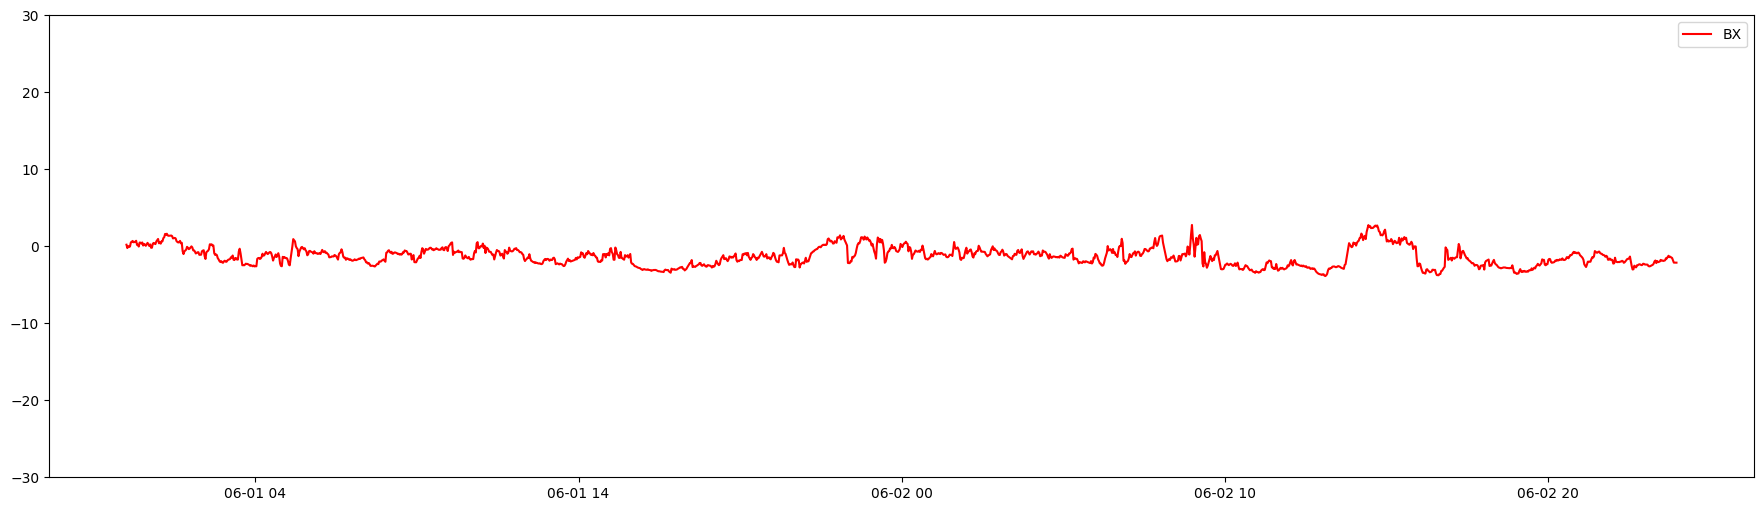

In [185]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np


time_range= cdflib.cdfepoch.to_datetime(cdf_file.varget('epoch'))


plt.figure(figsize=(22,6))
plt.ylim(-30,30)
plt.plot(time_range,cdf_file["BX"],color='red',label='BX')

# Add legend
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=10))

plt.show()

In [ ]:
# from modules.plotter import Plotting
# import matplotlib.pyplot as plt
# # plt.ioff()
# plot  = Plotting()

# t = plot.ipplot(days_3['t_range'],b_mag,BX,BY,BZ,tehta_angle,phi_angle,vp,p_density,temp,p_beta)

# t.savefig('myimage2.jpg', format='jpg', dpi=300)

In [8]:
import cdflib

cdf  = cdflib.CDF(r"download\combined\1994\wi_h1_swe_19941117 - 19941119.cdf")

In [10]:
time_range= cdflib.cdfepoch.to_datetime(cdf_file.varget('epoch'))

In [12]:
time_range[0]

numpy.datetime64('1994-11-18T00:01:44.121000')